## Analyze Interpretability Data!

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/utils/')
# sys.path.append('/glade/u/home/wchapman/ENSOvsMJO/utils/')
from exp_hp import get_hp

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [2]:
# print(confvsacc.shape) # 5,100
# print(model1_rawpreds.shape)  # 5,11584,2
# print(model_rawpreds.shape)   # 5,11584,2
# print(model2_fracpred.shape)  # 5
# print(model12_fracpred.shape) # 5

In [3]:
EXP_NAME = 'default'
hps = get_hp(EXP_NAME)

LEADS = np.arange(7,31)
AVGS = np.arange(2,32)
SEEDS = np.arange(1,6)

## Contribution Analysis:

In [4]:
# for a,avg in enumerate(AVGS):
#     if avg == AVGS[-1]:
#         plt.plot(model1_fracpred_avg[:,a]*100,'teal',alpha=avg/AVGS[-1],label='Model 1: ONI')
#         plt.plot(model2_fracpred_avg[:,a]*100,'purple',alpha=avg/AVGS[-1],label='Model 2: RMM')
#     else:
#         plt.plot(model1_fracpred_avg[:,a]*100,'teal',alpha=avg/AVGS[-1])
#         plt.plot(model2_fracpred_avg[:,a]*100,'purple',alpha=avg/AVGS[-1])
#     # plt.plot(model12_fracpred_avg[:,a]*100,'k',alpha=avg/AVGS[-1])
#     plt.ylim(0,50)
#     plt.yticks(np.arange(0,60,5),np.arange(0,60,5))
#     plt.ylabel('predictions correct (\%)')
#     plt.xlim(0,len(LEADS))
#     plt.xticks(np.arange(0,len(LEADS)),np.arange(LEADS[0],LEADS[-1]+1,1))
#     plt.xlabel('lead (days)')
# plt.legend()
# plt.show()

In [5]:
model1_fracpred_all  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model2_fracpred_all  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
# model12_fracpred_all = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))

model1_fracpred_corr  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model2_fracpred_corr  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
# model12_fracpred_corr = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))

model1_fracpred_conf  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model2_fracpred_conf  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
# model12_fracpred_all = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))

model1_fracpred_confcorr  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model2_fracpred_confcorr  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
# model12_fracpred_confcorr = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/scratch/kjmayer/DATA/ENSOvsMJO/data/'

        finame_fracpred = 'model1_allfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_all[l,a] = np.load(ddir_load+finame_fracpred)
        finame_fracpred = 'model2_allfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_all[l,a] = np.load(ddir_load+finame_fracpred)
        # finame_fracpred = 'model12_allfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model12_fracpred_all[l,a] = np.load(ddir_load+finame_fracpred)

        
        finame_fracpred  = 'model1_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_corr[l,a]  = np.load(ddir_load+finame_fracpred)
        finame_fracpred  = 'model2_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_corr[l,a]  = np.load(ddir_load+finame_fracpred)
        # finame_fracpred  = 'model12_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model12_fracpred_corr[l,a] = np.load(ddir_load+finame_fracpred)
        
        
        finame_fracpred = 'model1_conffracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_conf[l,a] = np.load(ddir_load+finame_fracpred)
        finame_fracpred = 'model2_conffracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_conf[l,a] = np.load(ddir_load+finame_fracpred)
        # finame_fracpred = 'model12_conffracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model12_fracpred_conf[l,a] = np.load(ddir_load+finame_fracpred)

        finame_fracpred = 'model1_confcorrfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_confcorr[l,a] = np.load(ddir_load+finame_fracpred)
        finame_fracpred = 'model2_confcorrfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_confcorr[l,a] = np.load(ddir_load+finame_fracpred)
        # finame_fracpred = 'model12_confcorrfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model12_fracpred_confcorr[l,a] = np.load(ddir_load+finame_fracpred)

model1_allfracpred_avg  = np.mean(model1_fracpred_all,axis=2)
model2_allfracpred_avg  = np.mean(model2_fracpred_all,axis=2)
# model12_allfracpred_avg = np.mean(model12_fracpred_all,axis=2)

model1_corrfracpred_avg  = np.mean(model1_fracpred_corr,axis=2)
model2_corrfracpred_avg  = np.mean(model2_fracpred_corr,axis=2)
# model12_corrfracpred_avg = np.mean(model12_fracpred_corr,axis=2)

model1_conffracpred_avg  = np.mean(model1_fracpred_conf,axis=2)
model2_conffracpred_avg  = np.mean(model2_fracpred_conf,axis=2)
# model12_conffracpred_avg = np.mean(model12_fracpred_conf,axis=2)

model1_confcorrfracpred_avg  = np.mean(model1_fracpred_confcorr,axis=2)
model2_confcorrfracpred_avg  = np.mean(model2_fracpred_confcorr,axis=2)
# model12_confcorrfracpred_avg = np.mean(model12_fracpred_confcorr,axis=2)

LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


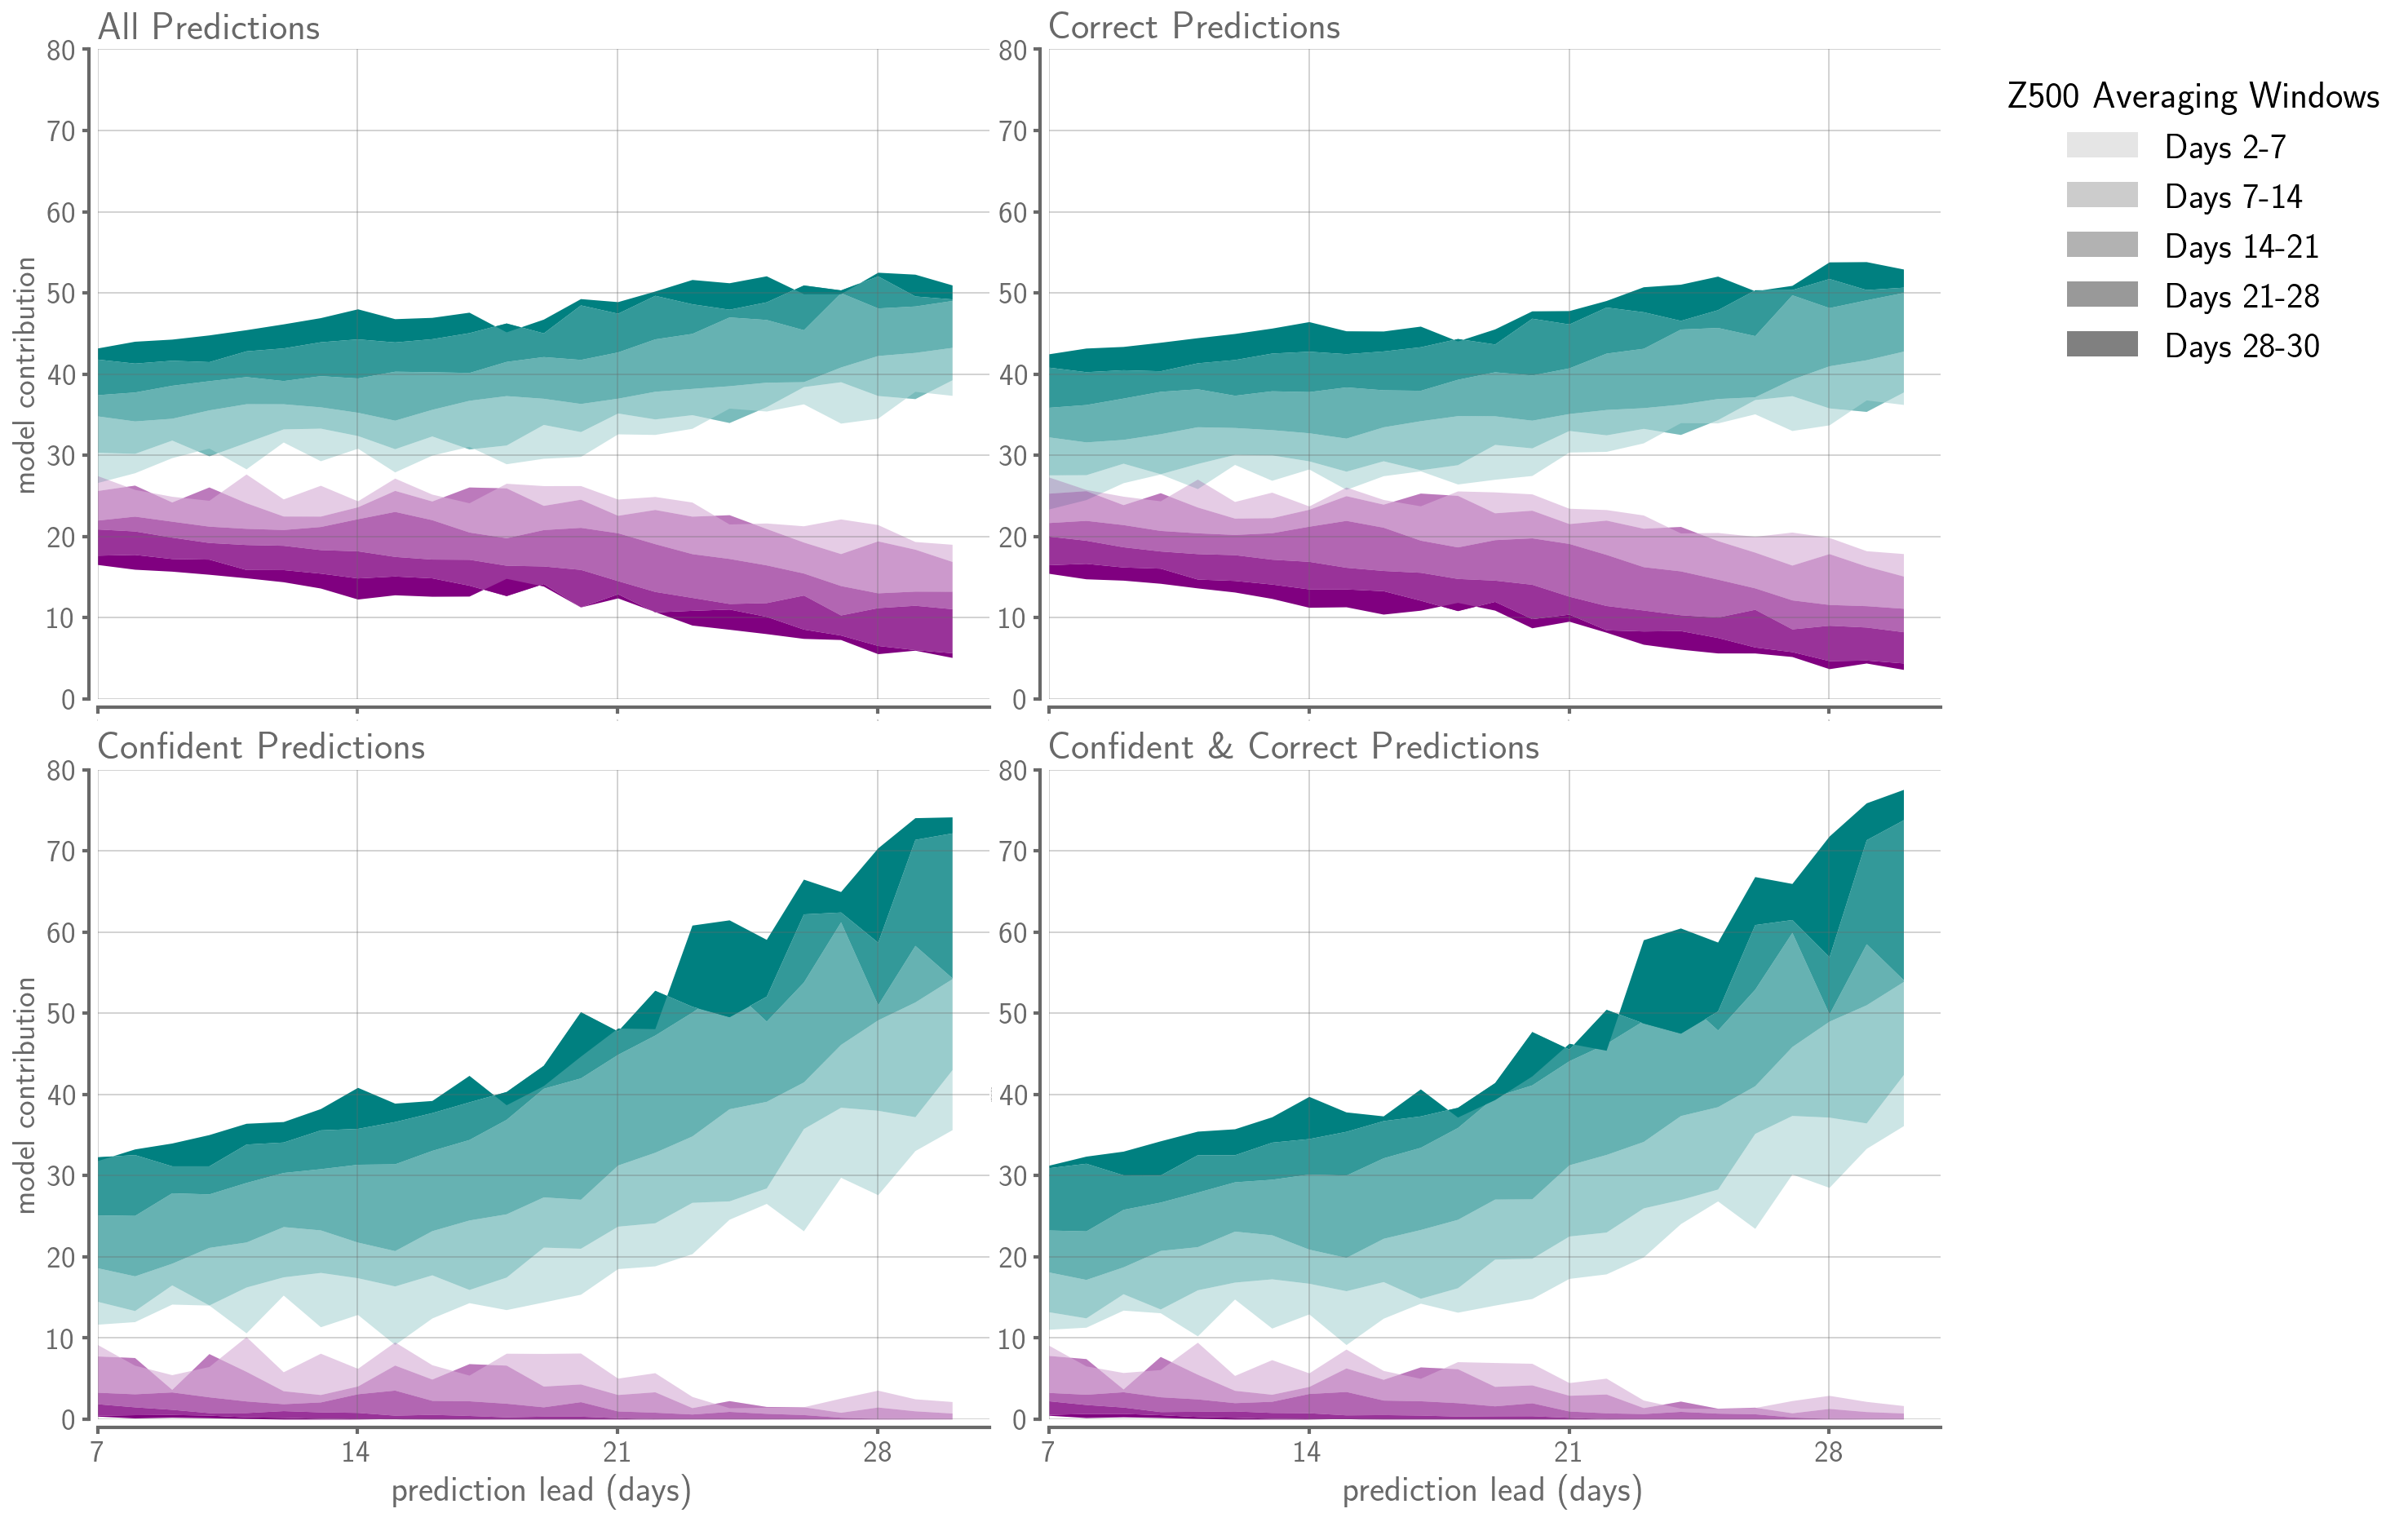

In [35]:
FS = 18
fig = plt.figure(figsize=(16,12))
ax = fig.subplot_mosaic('''
                        AB
                        CD
                        ''')
plt.tight_layout(w_pad=0)
for loc in ['A','B','C','D']:   
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    ax[loc].xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    
    ax[loc].set_ylim(0,80)
    ax[loc].set_yticks(np.arange(0,90,10))
    ax[loc].set_xlim(0,len(LEADS))
    ax[loc].set_xticks(np.arange(0,28,7))
    
    
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_allfracpred_avg[:,0]*100,
                 y2 = model1_allfracpred_avg[:,5]*100,
                color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_allfracpred_avg[:,5]*100,
                 y2 = model1_allfracpred_avg[:,12]*100,
                color='teal', alpha=0.4,linewidth=0)#,label='Week 2')
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_allfracpred_avg[:,12]*100,
                 y2 = model1_allfracpred_avg[:,19]*100,
                color='teal', alpha=0.6,linewidth=0)#,label='Week 3')
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_allfracpred_avg[:,19]*100,
                 y2 = model1_allfracpred_avg[:,26]*100,
                color='teal', alpha=0.8,linewidth=0)#,label='Week 4')
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_allfracpred_avg[:,26]*100,
                 y2 = model1_allfracpred_avg[:,29]*100,
                color='teal', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_allfracpred_avg[:,0]*100,
                 y2 = model2_allfracpred_avg[:,5]*100,
                 color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_allfracpred_avg[:,5]*100,
                 y2 = model2_allfracpred_avg[:,12]*100,
                 color='purple', alpha=0.4,linewidth=0)#,label='Week 2')
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_allfracpred_avg[:,12]*100,
                 y2 = model2_allfracpred_avg[:,19]*100,
                 color='purple', alpha=0.6,linewidth=0)#,label='Week 3')
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_allfracpred_avg[:,19]*100,
                 y2 = model2_allfracpred_avg[:,26]*100,
                 color='purple', alpha=0.8,linewidth=0)#,label='Week 4',)
ax['A'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_allfracpred_avg[:,26]*100,
                 y2 = model2_allfracpred_avg[:,29]*100,
                 color='purple', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['A'].set_title('All Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['A'].set_yticklabels(np.arange(0,90,10),fontsize=FS,color='dimgrey')
ax['A'].set_ylabel('model contribution',fontsize=FS+1,color='dimgrey')
ax['A'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=0,color='dimgrey')


#######

ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_corrfracpred_avg[:,0]*100,
                 y2 = model1_corrfracpred_avg[:,5]*100,
                color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_corrfracpred_avg[:,5]*100,
                 y2 = model1_corrfracpred_avg[:,12]*100,
                color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_corrfracpred_avg[:,12]*100,
                 y2 = model1_corrfracpred_avg[:,19]*100,
                color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_corrfracpred_avg[:,19]*100,
                 y2 = model1_corrfracpred_avg[:,26]*100,
                color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_corrfracpred_avg[:,26]*100,
                 y2 = model1_corrfracpred_avg[:,29]*100,
                 color='teal', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_corrfracpred_avg[:,0]*100,
                 y2 = model2_corrfracpred_avg[:,5]*100,
                 color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_corrfracpred_avg[:,5]*100,
                 y2 = model2_corrfracpred_avg[:,12]*100,
                 color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_corrfracpred_avg[:,12]*100,
                 y2 = model2_corrfracpred_avg[:,19]*100,
                 color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_corrfracpred_avg[:,19]*100,
                 y2 = model2_corrfracpred_avg[:,26]*100,
                 color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_corrfracpred_avg[:,26]*100,
                 y2 = model2_corrfracpred_avg[:,29]*100,
                 color='purple', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['B'].set_title('Correct Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['B'].set_yticklabels(np.arange(0,90,10),fontsize=FS,color='dimgrey')
ax['B'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=0,color='dimgrey')

ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 2-7', alpha=0.2,linewidth=0)
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 7-14', alpha=0.4,linewidth=0)
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 14-21', alpha=0.6,linewidth=0)
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 21-28', alpha=0.8,linewidth=0)
ax['B'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = np.zeros(shape=(len(LEADS)))+np.nan,
                 y2 = np.zeros(shape=(len(LEADS)))+np.nan,
                 color='grey',label='Days 28-30', alpha=1.0,linewidth=0)

ax['B'].legend(frameon=False, fontsize=FS+3,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left",
               title='Z500 Averaging Windows',title_fontsize=FS+4)


#######

ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_conffracpred_avg[:,0]*100,
                 y2 = model1_conffracpred_avg[:,5]*100,
                color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_conffracpred_avg[:,5]*100,
                 y2 = model1_conffracpred_avg[:,12]*100,
                color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_conffracpred_avg[:,12]*100,
                 y2 = model1_conffracpred_avg[:,19]*100,
                color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_conffracpred_avg[:,19]*100,
                 y2 = model1_conffracpred_avg[:,26]*100,
                color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')
ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_conffracpred_avg[:,26]*100,
                 y2 = model1_conffracpred_avg[:,29]*100,
                 color='teal', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_conffracpred_avg[:,0]*100,
                 y2 = model2_conffracpred_avg[:,5]*100,
                 color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_conffracpred_avg[:,5]*100,
                 y2 = model2_conffracpred_avg[:,12]*100,
                 color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_conffracpred_avg[:,12]*100,
                 y2 = model2_conffracpred_avg[:,19]*100,
                 color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_conffracpred_avg[:,19]*100,
                 y2 = model2_conffracpred_avg[:,26]*100,
                 color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')
ax['C'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_conffracpred_avg[:,26]*100,
                 y2 = model2_conffracpred_avg[:,29]*100,
                 color='purple', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['C'].set_title('Confident Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['C'].set_yticklabels(np.arange(0,90,10),fontsize=FS,color='dimgrey')
ax['C'].set_ylabel('model contribution',fontsize=FS+1,color='dimgrey')
ax['C'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
ax['C'].set_xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')


#######

ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_confcorrfracpred_avg[:,0]*100,
                 y2 = model1_confcorrfracpred_avg[:,5]*100,
                color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_confcorrfracpred_avg[:,5]*100,
                 y2 = model1_confcorrfracpred_avg[:,12]*100,
                color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_confcorrfracpred_avg[:,12]*100,
                 y2 = model1_confcorrfracpred_avg[:,19]*100,
                color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_confcorrfracpred_avg[:,19]*100,
                 y2 = model1_confcorrfracpred_avg[:,26]*100,
                color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model1_confcorrfracpred_avg[:,26]*100,
                 y2 = model1_confcorrfracpred_avg[:,29]*100,
                 color='teal', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_confcorrfracpred_avg[:,0]*100,
                 y2 = model2_confcorrfracpred_avg[:,5]*100,
                 color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_confcorrfracpred_avg[:,5]*100,
                 y2 = model2_confcorrfracpred_avg[:,12]*100,
                 color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_confcorrfracpred_avg[:,12]*100,
                 y2 = model2_confcorrfracpred_avg[:,19]*100,
                 color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_confcorrfracpred_avg[:,19]*100,
                 y2 = model2_confcorrfracpred_avg[:,26]*100,
                 color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')
ax['D'].fill_between(x = np.arange(0,len(LEADS)),
                 y1 = model2_confcorrfracpred_avg[:,26]*100,
                 y2 = model2_confcorrfracpred_avg[:,29]*100,
                 color='purple', alpha=1.0,linewidth=0)#,label='Days 28-31')

ax['D'].set_title('Confident \& Correct Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['D'].set_yticklabels(np.arange(0,90,10),fontsize=FS,color='dimgrey')
ax['D'].set_ylabel('model contribution',fontsize=0,color='dimgrey')
ax['D'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
ax['D'].set_xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')

plt.show()

In [36]:
# valColor = (141/255,171/255,127/255,1.)
# FS = 18
# plt.figure(figsize=(8, 6))


# #---------- plot loss -------------------
# ax = plt.subplot(1,1,1)
# adjust_spines(ax, ['left', 'bottom'])
# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.spines['left'].set_color('dimgrey')
# ax.spines['bottom'].set_color('dimgrey')
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
# ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
# ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_allfracpred_avg[:,0]*100,
#                  y2 = model1_allfracpred_avg[:,5]*100,
#                 color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_allfracpred_avg[:,5]*100,
#                  y2 = model1_allfracpred_avg[:,12]*100,
#                 color='teal', alpha=0.4,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_allfracpred_avg[:,12]*100,
#                  y2 = model1_allfracpred_avg[:,19]*100,
#                 color='teal', alpha=0.6,linewidth=0)#,label='Week 3')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_allfracpred_avg[:,19]*100,
#                  y2 = model1_allfracpred_avg[:,26]*100,
#                 color='teal', alpha=0.8,linewidth=0)#,label='Week 4')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_allfracpred_avg[:,26]*100,
#                  y2 = model1_allfracpred_avg[:,29]*100,
#                 color='teal', alpha=1.0,linewidth=0)#,label='Days 28-31')

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_allfracpred_avg[:,0]*100,
#                  y2 = model2_allfracpred_avg[:,5]*100,
#                  color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_allfracpred_avg[:,5]*100,
#                  y2 = model2_allfracpred_avg[:,12]*100,
#                  color='purple', alpha=0.4,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_allfracpred_avg[:,12]*100,
#                  y2 = model2_allfracpred_avg[:,19]*100,
#                  color='purple', alpha=0.6,linewidth=0)#,label='Week 3')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_allfracpred_avg[:,19]*100,
#                  y2 = model2_allfracpred_avg[:,26]*100,
#                  color='purple', alpha=0.8,linewidth=0)#,label='Week 4',)
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_allfracpred_avg[:,26]*100,
#                  y2 = model2_allfracpred_avg[:,29]*100,
#                  color='purple', alpha=1.0,linewidth=0)#,label='Days 28-31')

# plt.title('All Predictions',fontsize=FS+1,color='dimgrey')
# plt.ylim(0,70)
# plt.yticks(np.arange(0,80,10),np.arange(0,80,10),fontsize=FS,color='dimgrey')
# plt.ylabel('model contribution',fontsize=FS+1,color='dimgrey')
# plt.xlim(0,len(LEADS))
# plt.xticks(np.arange(0,28,7),np.arange(LEADS[0],LEADS[-1],7),fontsize=0,color='dimgrey')
# plt.show()

In [37]:
# valColor = (141/255,171/255,127/255,1.)
# FS = 18
# plt.figure(figsize=(8, 6))


# #---------- plot loss -------------------
# ax = plt.subplot(1,1,1)
# adjust_spines(ax, ['left', 'bottom'])
# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.spines['left'].set_color('dimgrey')
# ax.spines['bottom'].set_color('dimgrey')
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
# ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
# ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_corrfracpred_avg[:,0]*100,
#                  y2 = model1_corrfracpred_avg[:,7]*100,
#                 color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_corrfracpred_avg[:,7]*100,
#                  y2 = model1_corrfracpred_avg[:,14]*100,
#                 color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_corrfracpred_avg[:,14]*100,
#                  y2 = model1_corrfracpred_avg[:,21]*100,
#                 color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_corrfracpred_avg[:,21]*100,
#                  y2 = model1_corrfracpred_avg[:,-1]*100,
#                 color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_corrfracpred_avg[:,0]*100,
#                  y2 = model2_corrfracpred_avg[:,7]*100,
#                  color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_corrfracpred_avg[:,7]*100,
#                  y2 = model2_corrfracpred_avg[:,14]*100,
#                  color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_corrfracpred_avg[:,14]*100,
#                  y2 = model2_corrfracpred_avg[:,21]*100,
#                  color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_corrfracpred_avg[:,21]*100,
#                  y2 = model2_corrfracpred_avg[:,-1]*100,
#                  color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')

# plt.title('Correct Predictions',fontsize=FS+1,color='dimgrey')
# plt.ylim(0,70)
# plt.yticks(np.arange(0,80,10),np.arange(0,80,10),fontsize=FS,color='dimgrey')
# plt.ylabel('model contribution',fontsize=FS+1,color='dimgrey')
# plt.xlim(0,len(LEADS))
# plt.xticks(np.arange(0,28,7),np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
# plt.xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')
# plt.show()

In [38]:
# valColor = (141/255,171/255,127/255,1.)
# FS = 18
# plt.figure(figsize=(8, 6))


# #---------- plot loss -------------------
# ax = plt.subplot(1,1,1)
# adjust_spines(ax, ['left', 'bottom'])
# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.spines['left'].set_color('dimgrey')
# ax.spines['bottom'].set_color('dimgrey')
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
# ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
# ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_conffracpred_avg[:,0]*100,
#                  y2 = model1_conffracpred_avg[:,7]*100,
#                 color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_conffracpred_avg[:,7]*100,
#                  y2 = model1_conffracpred_avg[:,14]*100,
#                 color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_conffracpred_avg[:,14]*100,
#                  y2 = model1_conffracpred_avg[:,21]*100,
#                 color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_conffracpred_avg[:,21]*100,
#                  y2 = model1_conffracpred_avg[:,-1]*100,
#                 color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_conffracpred_avg[:,0]*100,
#                  y2 = model2_conffracpred_avg[:,7]*100,
#                  color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_conffracpred_avg[:,7]*100,
#                  y2 = model2_conffracpred_avg[:,14]*100,
#                  color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_conffracpred_avg[:,14]*100,
#                  y2 = model2_conffracpred_avg[:,21]*100,
#                  color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_conffracpred_avg[:,21]*100,
#                  y2 = model2_conffracpred_avg[:,-1]*100,
#                  color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = np.zeros(shape=(len(LEADS)))+np.nan,
#                  y2 = np.zeros(shape=(len(LEADS)))+np.nan,
#                  color='grey',label='Days 7-14', alpha=0.2,linewidth=0)
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = np.zeros(shape=(len(LEADS)))+np.nan,
#                  y2 = np.zeros(shape=(len(LEADS)))+np.nan,
#                  color='grey',label='Days 14-21', alpha=0.4,linewidth=0)
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = np.zeros(shape=(len(LEADS)))+np.nan,
#                  y2 = np.zeros(shape=(len(LEADS)))+np.nan,
#                  color='grey',label='Days 21-28', alpha=0.6,linewidth=0)
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = np.zeros(shape=(len(LEADS)))+np.nan,
#                  y2 = np.zeros(shape=(len(LEADS)))+np.nan,
#                  color='grey',label='Days 28-30', alpha=0.8,linewidth=0)

# plt.title('Confident Predictions',fontsize=FS+1,color='dimgrey')
# plt.ylim(0,70)
# plt.yticks(np.arange(0,80,10),np.arange(0,80,10),fontsize=0,color='dimgrey')
# plt.xlim(0,len(LEADS))
# plt.xticks(np.arange(0,28,7),np.arange(LEADS[0],LEADS[-1],7),fontsize=0,color='dimgrey')
# plt.legend(frameon=False, fontsize=FS,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left", title='Z500 Averaging Windows')
# plt.show()

In [39]:
# valColor = (141/255,171/255,127/255,1.)
# FS = 18
# plt.figure(figsize=(8, 6))


# #---------- plot loss -------------------
# ax = plt.subplot(1,1,1)
# adjust_spines(ax, ['left', 'bottom'])
# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.spines['left'].set_color('dimgrey')
# ax.spines['bottom'].set_color('dimgrey')
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
# ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
# ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,0]*100,
#                  y2 = model1_confcorrfracpred_avg[:,7]*100,
#                 color='teal', alpha=0.2,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,7]*100,
#                  y2 = model1_confcorrfracpred_avg[:,14]*100,
#                 color='teal', alpha=0.4,linewidth=0)#,label='Week 3')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,14]*100,
#                  y2 = model1_confcorrfracpred_avg[:,21]*100,
#                 color='teal', alpha=0.6,linewidth=0)#,label='Week 4')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model1_confcorrfracpred_avg[:,21]*100,
#                  y2 = model1_confcorrfracpred_avg[:,-1]*100,
#                 color='teal', alpha=0.8,linewidth=0)#,label='Days 28-31')

# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,0]*100,
#                  y2 = model2_confcorrfracpred_avg[:,7]*100,
#                  color='purple', alpha=0.2,linewidth=0)#,label='Week 2')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,7]*100,
#                  y2 = model2_confcorrfracpred_avg[:,14]*100,
#                  color='purple', alpha=0.4,linewidth=0)#,label='Week 3')
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,14]*100,
#                  y2 = model2_confcorrfracpred_avg[:,21]*100,
#                  color='purple', alpha=0.6,linewidth=0)#,label='Week 4',)
# plt.fill_between(x = np.arange(0,len(LEADS)),
#                  y1 = model2_confcorrfracpred_avg[:,21]*100,
#                  y2 = model2_confcorrfracpred_avg[:,-1]*100,
#                  color='purple', alpha=0.8,linewidth=0)#,label='Days 28-31')

# plt.title('Confident and Correct Predictions',fontsize=FS+1,color='dimgrey')
# plt.ylim(0,70)
# plt.yticks(np.arange(0,80,10),np.arange(0,80,10),fontsize=0,color='dimgrey')
# plt.xlim(0,len(LEADS))
# plt.xticks(np.arange(0,28,7),np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
# plt.xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')
# plt.show()

## Confidence vs Accuracy:

In [6]:
confvsacc_all = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/scratch/kjmayer/DATA/ENSOvsMJO/data/'

        finame_confvsacc = 'confvsacc_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        confvsacc_all[l,a] = np.load(ddir_load+finame_confvsacc)

        # finame_rawpred  = 'model1_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model1_rawpreds = np.load(ddir_load+finame_rawpred)
        # finame_rawpred  = 'model2_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model2_rawpreds = np.load(ddir_load+finame_rawpred)
        # finame_rawpred  = 'model_rawpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # model_rawpreds  = np.load(ddir_load+finame_rawpred)

confvsacc_all = np.mean(confvsacc_all,axis=2)

LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


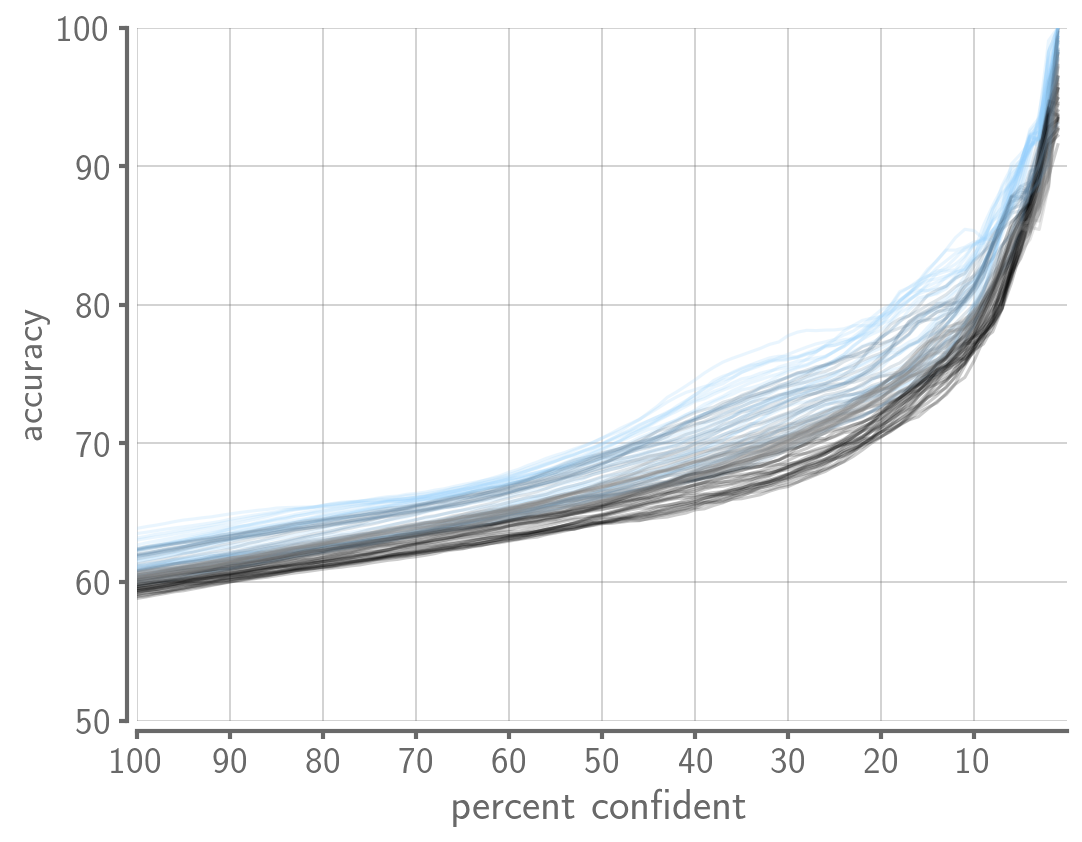

In [34]:
# valColor = (141/255,171/255,127/255,1.)
# FS = 18
# plt.figure(figsize=(8, 6))


# for l,lead in enumerate(LEADS):
#     ax = plt.subplot(1,1,1)
#     adjust_spines(ax, ['left', 'bottom'])
#     ax.spines['top'].set_color('none')
#     ax.spines['right'].set_color('none')
#     ax.spines['left'].set_color('dimgrey')
#     ax.spines['bottom'].set_color('dimgrey')
#     ax.spines['left'].set_linewidth(2)
#     ax.spines['bottom'].set_linewidth(2)
#     ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
#     ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
#     ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    
    
#     plt.plot(confvsacc_all[l,0],'k',alpha=0.2)
#     plt.plot(confvsacc_all[l,7],'grey',alpha=0.2)
#     plt.plot(confvsacc_all[l,14],'xkcd:steel blue',alpha=0.2)
#     plt.plot(confvsacc_all[l,21],'xkcd:light blue',alpha=0.2)

#     plt.ylim(50,100)
#     plt.yticks(np.arange(50,110,10),np.arange(50,110,10),fontsize=FS,color='dimgrey')
#     plt.ylabel('accuracy',fontsize=FS+1,color='dimgrey')
#     plt.xlim(0,100)
#     plt.xticks(np.arange(0,100,10),np.arange(10,110,10)[::-1],fontsize=FS,color='dimgrey')
#     plt.xlabel('percent confident',fontsize=FS+3,color='dimgrey')
#     # plt.legend(frameon=False, fontsize=FS,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left", title='Z500 Averaging Windows')

# plt.show()

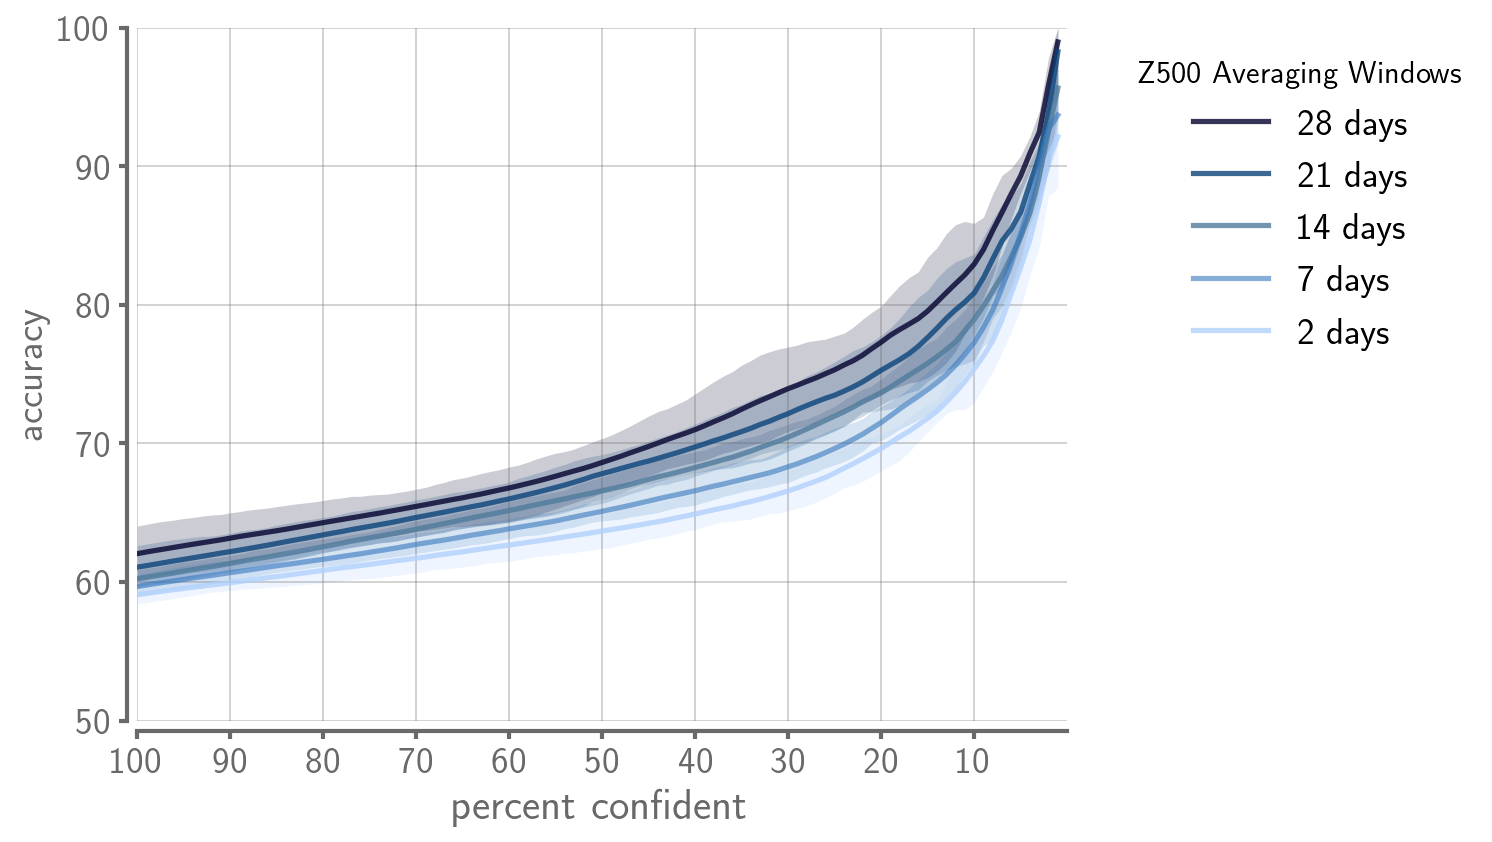

In [9]:
valColor = (141/255,171/255,127/255,1.)
FS = 18
plt.figure(figsize=(8, 6))

ax = plt.subplot(1,1,1)
adjust_spines(ax, ['left', 'bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')
ax.yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
ax.xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

plt.plot(np.mean(confvsacc_all[:,26],axis=0),'xkcd:midnight',alpha=0.8,label='28 days',linewidth=2.5)
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,26],axis=0),
                 y2 = np.max(confvsacc_all[:,26],axis=0),color='xkcd:midnight',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all[:,19],axis=0),'xkcd:twilight blue',alpha=0.8,label='21 days',linewidth=2.5)
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,19],axis=0),
                 y2 = np.max(confvsacc_all[:,19],axis=0),color='xkcd:twilight blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all[:,12],axis=0),'xkcd:stormy blue',alpha=0.8,label='14 days',linewidth=2.5)
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,12],axis=0),
                 y2 = np.max(confvsacc_all[:,12],axis=0),color='xkcd:light navy blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all[:,5],axis=0),'xkcd:windows blue',alpha=0.6,label='7 days',linewidth=2.5)
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,5],axis=0),
                 y2 = np.max(confvsacc_all[:,5],axis=0),color='xkcd:windows blue',alpha=0.2,linewidth=0)

plt.plot(np.mean(confvsacc_all[:,0],axis=0),'xkcd:powder blue',alpha=0.8,label='2 days',linewidth=2.5)
plt.fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,0],axis=0),
                 y2 = np.max(confvsacc_all[:,0],axis=0),color='xkcd:powder blue',alpha=0.2,linewidth=0)

plt.ylim(50,100)
plt.yticks(np.arange(50,110,10),np.arange(50,110,10),fontsize=FS,color='dimgrey')
plt.ylabel('accuracy',fontsize=FS+1,color='dimgrey')
plt.xlim(0,100)
plt.xticks(np.arange(0,100,10),np.arange(10,110,10)[::-1],fontsize=FS,color='dimgrey')
plt.xlabel('percent confident',fontsize=FS+3,color='dimgrey')
plt.legend(frameon=False, fontsize=FS,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left", title='Z500 Averaging Windows')

plt.show()